In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams.update({'font.size': 12})

In [2]:
datadir_input = "data/raw_data/"
datadir_output = "data/generated_histograms/"

data = pd.read_hdf(datadir_input + "data.h5")
mc_bkg = pd.read_hdf(datadir_input + "mc_bkg_new.h5")
mc_sig = pd.read_hdf(datadir_input + "mc_sig.h5")

In [57]:
print(data)
print(mc_bkg)
print(mc_sig)

           Muons_Minv_MuMu_Paper  CombWeight
0                      93.183510         1.0
1                      89.225815         1.0
2                      90.821861         1.0
3                      88.961380         1.0
4                      94.124649         1.0
...                          ...         ...
106148608              92.394798         1.0
106148609              82.044197         1.0
106148610              84.881805         1.0
106148611              91.650719         1.0
106148612              92.092552         1.0

[106148613 rows x 2 columns]
           Muons_Minv_MuMu_Paper  CombWeight
0                      26.631763    0.032597
1                      27.299959    0.023266
2                     118.517838    0.028304
3                     173.013474    0.005582
4                     142.408386    0.033223
...                          ...         ...
311281897              99.019943    0.034224
311281898             117.885620    0.035883
311281899             109

In [5]:
data['Muons_Minv_MuMu_Paper']

0            93.183510
1            89.225815
2            90.821861
3            88.961380
4            94.124649
               ...    
106148608    92.394798
106148609    82.044197
106148610    84.881805
106148611    91.650719
106148612    92.092552
Name: Muons_Minv_MuMu_Paper, Length: 106148613, dtype: float32

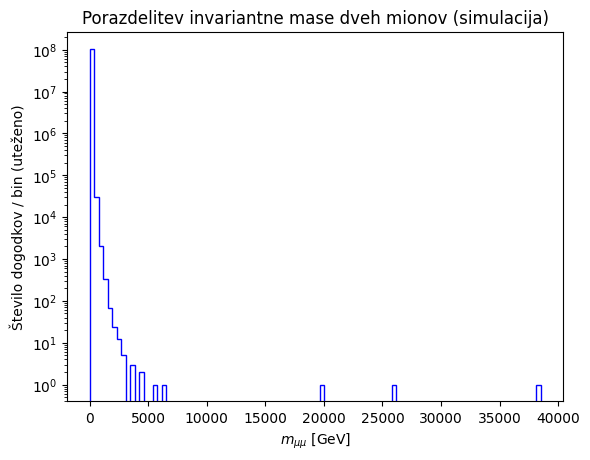

In [ ]:
plt.hist(
    data['Muons_Minv_MuMu_Paper'], 
    bins=100, 
    weights=data['CombWeight'],   # tukaj so tvoje uteži
    histtype='step', 
    color='blue'
)
plt.yscale('log')
plt.xlabel(r'$m_{\mu\mu}$ [GeV]')
plt.ylabel('Število dogodkov / bin (uteženo)')
plt.title('Porazdelitev invariantne mase dveh mionov')
plt.show()

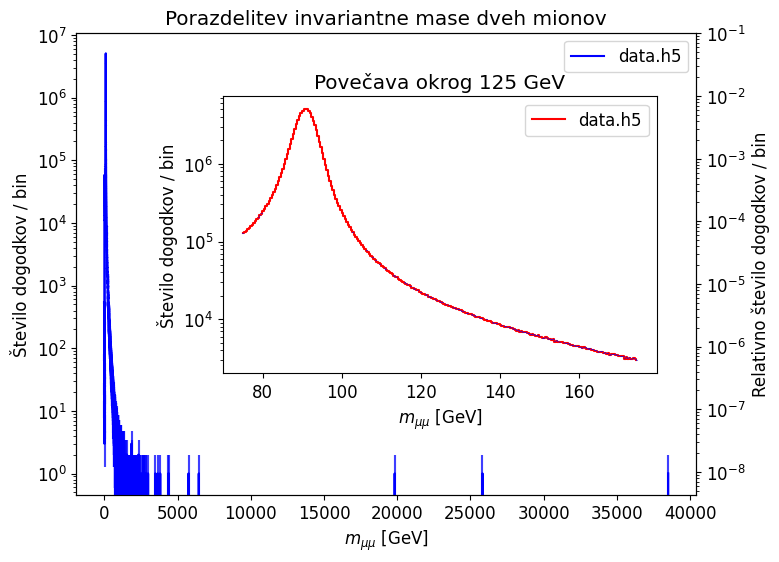

In [ ]:
values = data['Muons_Minv_MuMu_Paper']
weights = data['CombWeight']

bins = 100000
hist_vals, bin_edges = np.histogram(values, bins=bins, weights=weights)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

hist_sq, _ = np.histogram(values, bins=bins, weights=weights**2)
hist_errors = np.sqrt(hist_sq)

fig, ax = plt.subplots(figsize=(8,6))

# Glavni histogram (levo y-os)
ax.step(bin_edges[:-1], hist_vals, where='post', color='blue', label='data.h5')
ax.errorbar(bin_centers, hist_vals, yerr=hist_errors, fmt='none', ecolor='blue', alpha=0.5)
ax.set_yscale('log')
ax.set_xlabel(r'$m_{\mu\mu}$ [GeV]')
ax.set_ylabel('Število dogodkov / bin')
ax.set_title('Porazdelitev invariantne mase dveh mionov')
ax.legend(loc='upper right')

# Sekundarna y-os (desno)
ax2 = ax.twinx()
hist_norm = hist_vals / np.sum(hist_vals)
hist_norm_err = hist_errors / np.sum(hist_vals)

ax2.step(bin_edges[:-1], hist_norm, where='post', color='blue')
ax2.errorbar(bin_centers, hist_norm, yerr=hist_norm_err, fmt='none', ecolor='blue', alpha=0.5)
ax2.set_yscale('log')
ax2.set_ylabel('Relativno število dogodkov / bin')

# Inset za območje okrog mμμ ~ 250 GeV
x_min, x_max = 75, 175  # interval za zoom
axins = inset_axes(ax, width="70%", height="60%", loc='upper right', 
                  bbox_to_anchor=(-0.05, -0.12, 1., 1.), bbox_transform=ax.transAxes)

# Step graf z napakami
mask = (bin_centers >= x_min) & (bin_centers <= x_max)
axins.step(bin_edges[:-1][mask], hist_vals[mask], where='post', color='red', label='data.h5')
axins.errorbar(bin_centers[mask], hist_vals[mask], yerr=hist_errors[mask], fmt='none', ecolor='blue', alpha=0.5)

axins.set_yscale('log')
axins.set_xlabel(r'$m_{\mu\mu}$ [GeV]')
axins.set_ylabel('Število dogodkov / bin')
axins.tick_params(axis='both', which='major')
axins.set_title('Povečava okrog 125 GeV')
axins.legend()

plt.show()

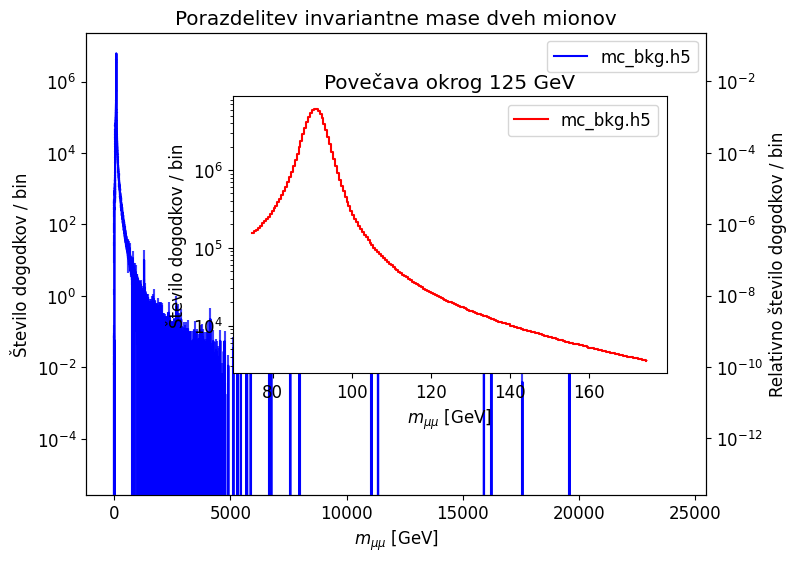

In [58]:
values = mc_bkg['Muons_Minv_MuMu_Paper']
weights = mc_bkg['CombWeight']

bins = 50000
hist_vals, bin_edges = np.histogram(values, bins=bins, weights=weights)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

hist_sq, _ = np.histogram(values, bins=bins, weights=weights**2)
hist_errors = np.sqrt(hist_sq)

fig, ax = plt.subplots(figsize=(8,6))

# Glavni histogram (levo y-os)
ax.step(bin_edges[:-1], hist_vals, where='post', color='blue', label='mc_bkg.h5')
ax.errorbar(bin_centers, hist_vals, yerr=hist_errors, fmt='none', ecolor='blue', alpha=0.5)
ax.set_yscale('log')
ax.set_xlabel(r'$m_{\mu\mu}$ [GeV]')
ax.set_ylabel('Število dogodkov / bin')
ax.set_title('Porazdelitev invariantne mase dveh mionov')
ax.legend(loc='upper right')

# Sekundarna y-os (desno)
ax2 = ax.twinx()
hist_norm = hist_vals / np.sum(hist_vals)
hist_norm_err = hist_errors / np.sum(hist_vals)

ax2.step(bin_edges[:-1], hist_norm, where='post', color='blue')
ax2.errorbar(bin_centers, hist_norm, yerr=hist_norm_err, fmt='none', ecolor='blue', alpha=0.5)
ax2.set_yscale('log')
ax2.set_ylabel('Relativno število dogodkov / bin')

# Inset za območje okrog mμμ ~ 250 GeV
x_min, x_max = 75, 175  # interval za zoom
axins = inset_axes(ax, width="70%", height="60%", loc='upper right', 
                   bbox_to_anchor=(-0.05, -0.12, 1., 1.), bbox_transform=ax.transAxes)

# Step graf z napakami
mask = (bin_centers >= x_min) & (bin_centers <= x_max)
axins.step(bin_edges[:-1][mask], hist_vals[mask], where='post', color='red', label='mc_bkg.h5')
axins.errorbar(bin_centers[mask], hist_vals[mask], yerr=hist_errors[mask], fmt='none', ecolor='red', alpha=0.5)

axins.set_yscale('log')
axins.set_xlabel(r'$m_{\mu\mu}$ [GeV]')
axins.set_ylabel('Število dogodkov / bin')
axins.tick_params(axis='both', which='major')
axins.set_title('Povečava okrog 125 GeV')
axins.legend()

plt.show()

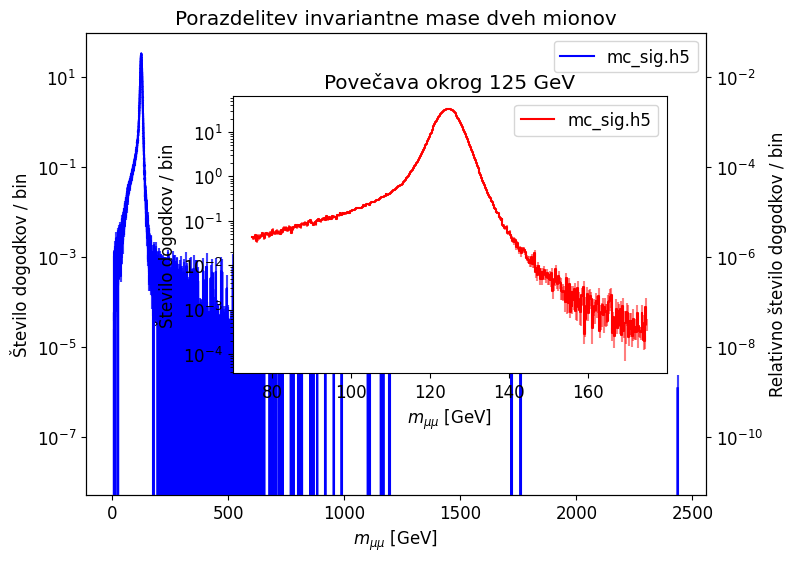

In [56]:
values = mc_sig['Muons_Minv_MuMu_Paper']
weights = mc_sig['CombWeight']

bins = 10000
hist_vals, bin_edges = np.histogram(values, bins=bins, weights=weights)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

hist_sq, _ = np.histogram(values, bins=bins, weights=weights**2)
hist_errors = np.sqrt(hist_sq)

fig, ax = plt.subplots(figsize=(8,6))

# Glavni histogram (levo y-os)
ax.step(bin_edges[:-1], hist_vals, where='post', color='blue', label='mc_sig.h5')
ax.errorbar(bin_centers, hist_vals, yerr=hist_errors, fmt='none', ecolor='blue', alpha=0.5)
ax.set_yscale('log')
ax.set_xlabel(r'$m_{\mu\mu}$ [GeV]')
ax.set_ylabel('Število dogodkov / bin')
ax.set_title('Porazdelitev invariantne mase dveh mionov')
ax.legend(loc='upper right')

# Sekundarna y-os (desno)
ax2 = ax.twinx()
hist_norm = hist_vals / np.sum(hist_vals)
hist_norm_err = hist_errors / np.sum(hist_vals)

ax2.step(bin_edges[:-1], hist_norm, where='post', color='blue')
ax2.errorbar(bin_centers, hist_norm, yerr=hist_norm_err, fmt='none', ecolor='blue', alpha=0.5)
ax2.set_yscale('log')
ax2.set_ylabel('Relativno število dogodkov / bin')

# Inset za območje okrog mμμ ~ 250 GeV
x_min, x_max = 75, 175  # interval za zoom
axins = inset_axes(ax, width="70%", height="60%", loc='upper right', 
                   bbox_to_anchor=(-0.05, -0.12, 1., 1.), bbox_transform=ax.transAxes)

# Step graf z napakami
mask = (bin_centers >= x_min) & (bin_centers <= x_max)
axins.step(bin_edges[:-1][mask], hist_vals[mask], where='post', color='red', label='mc_sig.h5')
axins.errorbar(bin_centers[mask], hist_vals[mask], yerr=hist_errors[mask], fmt='none', ecolor='red', alpha=0.5)

axins.set_yscale('log')
axins.set_xlabel(r'$m_{\mu\mu}$ [GeV]')
axins.set_ylabel('Število dogodkov / bin')
axins.tick_params(axis='both', which='major')
axins.set_title('Povečava okrog 125 GeV')
axins.legend()

plt.show()